<a href="https://www.kaggle.com/code/ashioyajotham/great-motors?scriptVersionId=97402404" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/greatmotors/SampleSubmission.csv
/kaggle/input/greatmotors/Train.csv
/kaggle/input/greatmotors/VariableDefinitions.csv
/kaggle/input/greatmotors/Test.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
train = pd.read_csv("../input/greatmotors/Train.csv")
test = pd.read_csv("../input/greatmotors/Test.csv")
var = pd.read_csv("../input/greatmotors/VariableDefinitions.csv")
sample = pd.read_csv("../input/greatmotors/SampleSubmission.csv")

In [4]:
train.tail()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"
7204,VHL15246,Abuja,Honda,Accord Crosstour,"2,012",Gray,3.38,Nigerian Used,"83,308"


In [5]:
var

,VehicleID,This is the unique identifier of the car.
0,Location,This is the location in Nigeria where the sell...
1,Maker,This is the manufacturer of the car. It is the...
2,Model,This is the the name of the car product within...
3,Year,This is the year the car was manufactured.
4,Colour,This is the colour of the car.
5,Amount (Million Naira),This is the selling price of the car. It is th...
6,Type,"This is the nature of previous use of the car,..."
7,Distance,This is the mileage of the car. It is how much...


In [6]:
test.head()

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [7]:
sample.head()

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0


# Data Wrangling

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7188 non-null   float64
 7   Type                    7008 non-null   object 
 8   Distance                4845 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


In [9]:
train.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [10]:
train["Year"] = train["Year"].str.replace(",","")
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,"125,206"


In [11]:
train.Year.value_counts()

2008    755
2010    618
2013    599
2007    484
2012    460
2011    455
2009    439
2014    412
2015    369
2006    349
2005    298
2017    291
2016    280
2018    269
2004    222
2020    204
2019    189
2021    145
2003    122
2002     74
2001     55
2000     39
1999     19
1998     11
2022     10
1997      5
1992      3
1986      2
1995      2
1993      1
1996      1
1979      1
1989      1
Name: Year, dtype: int64

In [12]:
train["Year"] = train["Year"].fillna(2008)
train.Year.isnull().any()

False

In [13]:
train["Amount (Million Naira)"] = train["Amount (Million Naira)"].fillna(train["Amount (Million Naira)"].mean())
train["Amount (Million Naira)"].isnull().any()

False

In [14]:
train["Type"] = train["Type"].fillna("Nigerian Used")
train["Type"].isnull().any()

False

In [15]:
train["Distance"] = train["Distance"].str.replace(",","")

In [16]:
train["Distance"] = train["Distance"].str.replace(",","").astype("float")

In [17]:
train.Distance.dtype

dtype('float64')

In [18]:
train["Distance"] = train["Distance"].fillna(train["Distance"].mean())
train["Distance"].isnull().any()

False

# Outliers
* Outlier detection
* Outlier treatment

<AxesSubplot:xlabel='Amount (Million Naira)'>

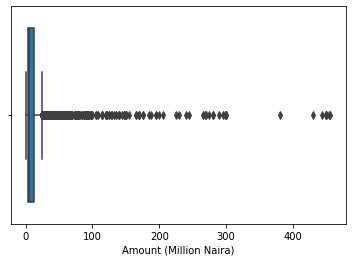

In [19]:
train["Amount (Million Naira)"] = train["Amount (Million Naira)"].astype("float")
sns.boxplot(train["Amount (Million Naira)"])

<AxesSubplot:xlabel='Distance'>

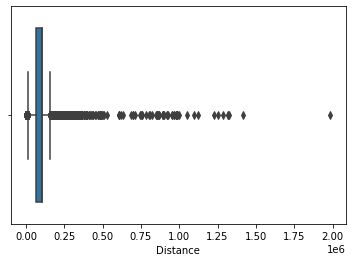

In [20]:
sns.boxplot(train.Distance)

In [21]:
train["Amount (Million Naira)"].describe()

count    7205.000000
mean       11.847999
std        25.289031
min         0.450000
25%         3.500000
50%         5.700000
75%        11.800000
max       456.000000
Name: Amount (Million Naira), dtype: float64

In [22]:
print(train["Amount (Million Naira)"].quantile(0.10))
print(train["Amount (Million Naira)"].quantile(0.90))

2.25
23.0


In [23]:
train["Amount (Million Naira)"] = np.where(train["Amount (Million Naira)"]<2.25, 2.25, train["Amount (Million Naira)"])
train["Amount (Million Naira)"] = np.where(train["Amount (Million Naira)"]>23.0, 23.0, train["Amount (Million Naira)"])
# calculate the skewness
print(train["Amount (Million Naira)"].skew())

1.1553545831815835


In [24]:
index = train[(train["Amount (Million Naira)"] >= 456.000000)|(train["Amount (Million Naira)"] <= 0.450000)].index
train.drop(index, inplace = True)
train["Amount (Million Naira)"].describe()

count    7205.000000
mean        8.454881
std         6.641596
min         2.250000
25%         3.500000
50%         5.700000
75%        11.800000
max        23.000000
Name: Amount (Million Naira), dtype: float64

<AxesSubplot:xlabel='Amount (Million Naira)'>

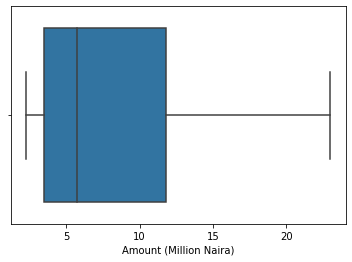

In [25]:
sns.boxplot(train["Amount (Million Naira)"])

In [26]:
train["Distance"].describe()

count    7.205000e+03
mean     1.031989e+05
std      9.699830e+04
min      1.000000e+00
25%      6.700000e+04
50%      1.031989e+05
75%      1.031989e+05
max      1.985400e+06
Name: Distance, dtype: float64

In [27]:
print(train.Distance.quantile(0.10))
print(train.Distance.quantile(0.90))

36000.0
150000.0


In [28]:
train["Distance"] = np.where(train["Distance"]<36000.0, 36000.0, train["Distance"])
train["Distance"] = np.where(train["Distance"]>150000.0, 150000.0, train["Distance"])
# Print skewness
print(train.Distance.skew())

-0.06007411506320979


In [29]:
index = train[(train["Distance"]>=1.985400e+06)|(train["Distance"]<=1.000000e+00)].index
train.drop(index, inplace = True)
train.Distance.describe()

count      7205.000000
mean      91723.366346
std       32870.384025
min       36000.000000
25%       67000.000000
50%      103198.903612
75%      103198.903612
max      150000.000000
Name: Distance, dtype: float64

<AxesSubplot:xlabel='Distance'>

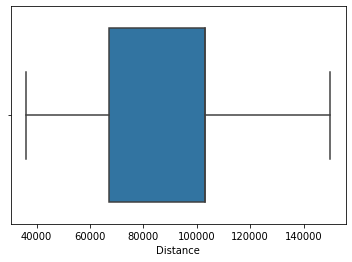

In [30]:
sns.boxplot(train.Distance)

# Feature Engineering
* Transmission

In [31]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.25,Nigerian Used,103198.903612
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.50,Nigerian Used,125000.000000
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.20,Foreign Used,110852.000000
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.80,Foreign Used,36000.000000
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.60,Nigerian Used,125206.000000


In [32]:
train.Maker.value_counts()

Toyota           2742
Lexus            1599
Mercedes-Benz    1213
Honda             358
Hyundai           162
Acura             154
Land Rover        124
Ford              120
BMW               111
Nissan            101
Peugeot            75
Kia                66
Volkswagen         54
Pontiac            30
Mazda              28
Dodge              24
Audi               23
Mitsubishi         23
Chevrolet          21
Infiniti           18
Jeep               18
Jaguar             12
Rolls-Royce        10
Mini                9
GMC                 8
Suzuki              8
Cadillac            7
Scion               7
Porsche             7
Volvo               7
Bentley             6
Maserati            6
Lincoln             6
Buick               5
Chrysler            4
Lamborghini         4
Opel                4
Rover               3
GAC                 3
Renault             3
Fiat                3
Citroen             2
Subaru              2
Saturn              2
JAC                 2
Hummer    

In [33]:
auto = []
for i in train.Maker:
    if i == [["Ferrari", "Brabus", "Lamborghini", "Cadillac", 
              "Rolls-Royce", "Maserati", "Lincoln","Land Rover"]]:
        auto.append("Automatic")
    else:
        auto.append("Manual")

In [34]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [35]:
train["Transmission"] = pd.Series(auto)
train.columns
train = train[['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour', 'Year',
       'Amount (Million Naira)', 'Type', 'Distance']]

In [36]:
train.head()

,VehicleID,Location,Maker,Model,Transmission,Colour,Year,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,Manual,Silver,2011,2.25,Nigerian Used,103198.903612
1,VHL18827,Ibadan,Hyundai,Sonata,Manual,Silver,2012,3.50,Nigerian Used,125000.000000
2,VHL19499,Lagos,Lexus,RX 350,Manual,Red,2010,9.20,Foreign Used,110852.000000
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,Manual,Blue,2017,22.80,Foreign Used,36000.000000
4,VHL12170,Ibadan,Toyota,Highlander,Manual,Red,2002,2.60,Nigerian Used,125206.000000


In [37]:
test["Transmission"] = pd.Series(auto)
test.columns
test = test[['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour', 'Year',
       'Type', 'Distance']]

In [38]:
train.Year = train.Year.astype("object")

# Exploratory Data Analysis

In [39]:
train[["Amount (Million Naira)", "Distance"]].describe()

,Amount (Million Naira),Distance
count,7205.000000,7205.000000
mean,8.454881,91723.366346
std,6.641596,32870.384025
min,2.250000,36000.000000
25%,3.500000,67000.000000
50%,5.700000,103198.903612
75%,11.800000,103198.903612
max,23.000000,150000.000000


In [40]:
corr = train[["Amount (Million Naira)", "Distance"]].corr()
corr

,Amount (Million Naira),Distance
Amount (Million Naira),1.000000,-0.435723
Distance,-0.435723,1.000000


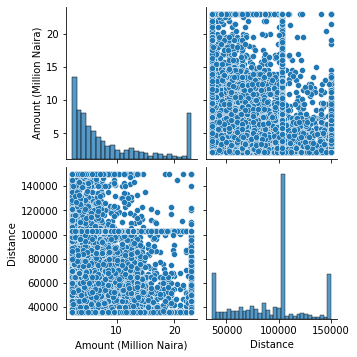

In [41]:
sns.pairplot(train[["Amount (Million Naira)", "Distance"]])

<AxesSubplot:>

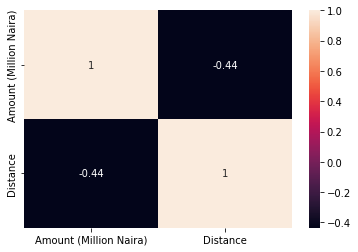

In [42]:
sns.heatmap(corr, annot = True)

In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

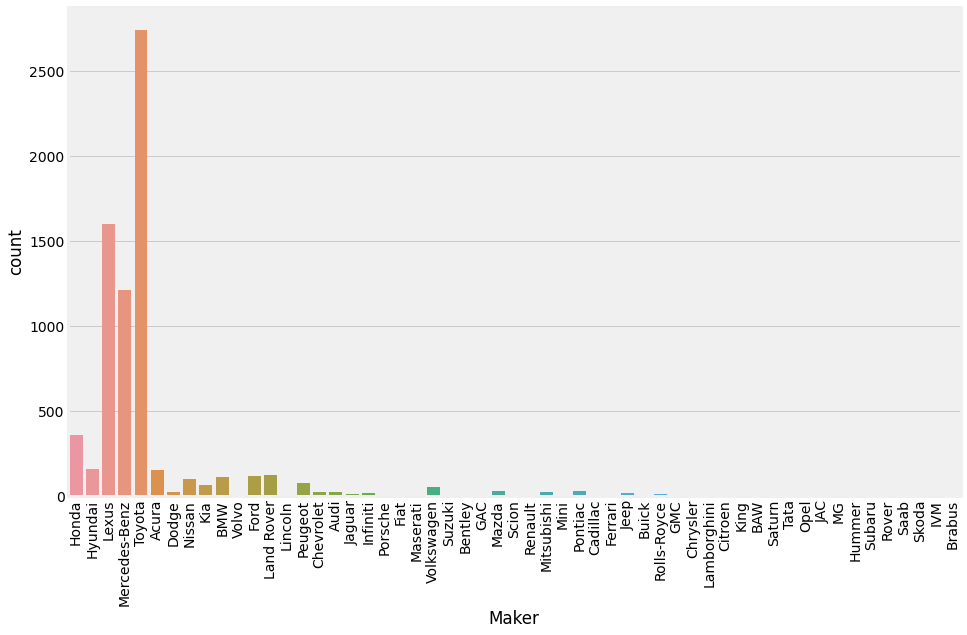

In [44]:
plt.figure(figsize=(16,9))
plt.style.use("fivethirtyeight")
sns.countplot(train.Maker)
plt.xticks(rotation = "vertical");

<AxesSubplot:xlabel='Location', ylabel='count'>

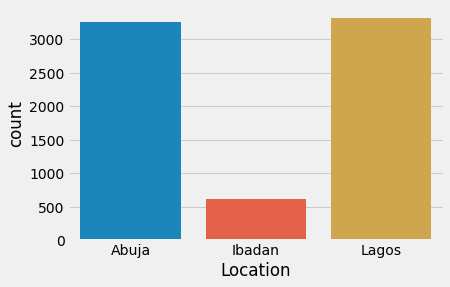

In [45]:
sns.countplot(train["Location"])

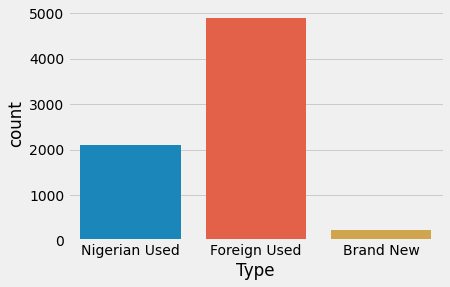

In [46]:
sns.countplot(train.Type);

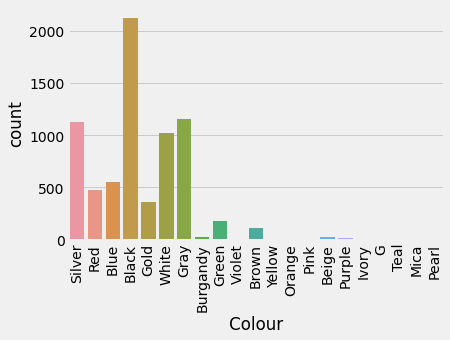

In [47]:
sns.countplot(train.Colour);
plt.xticks(rotation="vertical");

## Year v. Naira

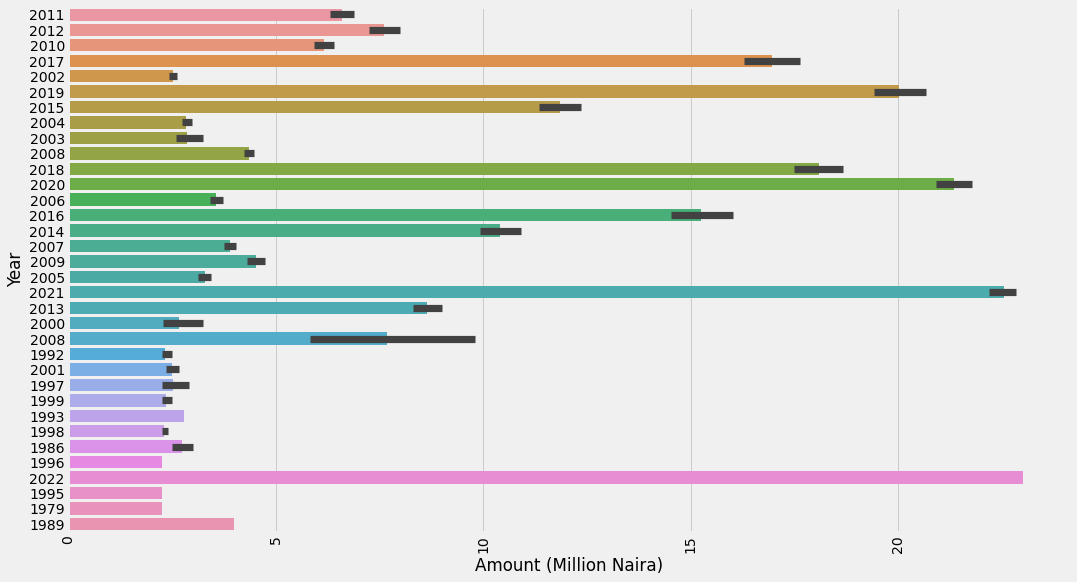

In [48]:
plt.figure(figsize=(16,9))
sns.barplot(data = train, y = "Year", x = "Amount (Million Naira)")
plt.xticks(rotation = "vertical");

# Modelling
* Split

In [49]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour',
       'Year', 'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [50]:
feats = ['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour',
       'Year', 'Type']
X = train[feats].astype(str)
y = train["Amount (Million Naira)"]

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
model = make_pipeline(OneHotEncoder(handle_unknown = "ignore"), LinearRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([19.43886137,  1.63578901,  5.71259805, ...,  3.7775799 ,
       11.24177402,  6.06787681])

In [52]:
mse = mean_absolute_error(y_pred, y_test)
mse

2.129755115870874

In [53]:
r2core = r2_score(y_pred, y_test)
r2core

0.8028665802088554

In [54]:
test = test[feats]
# Make prediction on the test set
predictions = model.predict(test)

# # Create a submission file
sub_file = sample.copy()
sub_file["Amount (Million Naira)"] = predictions

In [55]:
#sub_file.to_csv("gm.csv", index = False)

In [56]:
train.columns

Index(['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour',
       'Year', 'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [57]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour',
       'Year', 'Type']

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col].astype(str))

# Preview engineered test dataset
train.head()

,VehicleID,Location,Maker,Model,Transmission,Colour,Year,Amount (Million Naira),Type,Distance
0,1317,0,17,117,0,16,21,2.25,2,103198.903612
1,4534,1,19,1049,0,16,22,3.50,2,125000.000000
2,4883,2,29,908,0,15,20,9.20,1,110852.000000
3,4113,0,34,508,0,2,27,22.80,1,36000.000000
4,1121,1,52,569,0,15,12,2.60,2,125206.000000


In [58]:
from sklearn.ensemble import RandomForestRegressor

feats = ['VehicleID', 'Location', 'Maker', 'Model', 'Transmission', 'Colour',
       'Year', 'Type']
X = train[feats].astype(str)
y = train["Amount (Million Naira)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([8.21132336, 8.21132336, 8.21132336, ..., 8.21132336, 8.21132336,
       8.21132336])

In [59]:
r2core = r2_score(y_pred, y_test)
r2core

-164.42676039155015

In [60]:
mse = mean_absolute_error(y_pred, y_test)
mse

5.282870364932289

In [61]:
test = test[feats]
# Make prediction on the test set
predictions = model.predict(test)

# # Create a submission file
sub_file = sample.copy()
sub_file["Amount (Million Naira)"] = predictions

#sub_file.to_csv("gm1.csv", index = False)